In [1]:
import pandas as pd
import json
from utils import *
from agglo import *
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt

In [32]:
def get_moving_average(comments,alpha):
    date_ratings = []
    for comment in comments:
        date = comment["Date"]
        format_of_date = "%d %B %Y"
        new_date = datetime.strptime(date,format_of_date)
        x = []
        x.append(new_date)
        if comment["Rating"] == "None":
            x.append(10)
        else:
            x.append(int(comment["Rating"]))
        date_ratings.append(x)
    date_ratings.sort(key=lambda x:x[0])
    date_ratings_moving_avg = []
    average_till_now = 0.0
    for comment in date_ratings:
        if len(date_ratings_moving_avg)==0:
            date_ratings_moving_avg.append(comment)
            average_till_now = comment[1]
        else:
            average_till_now = alpha*comment[1] + (1-alpha)*average_till_now
            x = []
            x.append(comment[0])
            x.append(average_till_now)
            date_ratings_moving_avg.append(x)
    return date_ratings_moving_avg

In [44]:
def graph_of_data(data1,data2,title):
    x1 = []
    x2 = []
    y = []
    for d in data1:
        x1.append(d[1])
        y.append(d[0])
    for d in data2:
        x2.append(d[1]-1.5)
    plt.rcParams.update({'font.size': 22})
    plt.figure(figsize=(16,9))
    plt.plot(y,x1,color='orange',label='IMDB Rating')
    plt.plot(y,x2,color='black',label='Model Rating')
    plt.xlabel('Date')
    plt.ylabel('Rating')
    plt.title(title)
    plt.savefig(title,transparent=False)

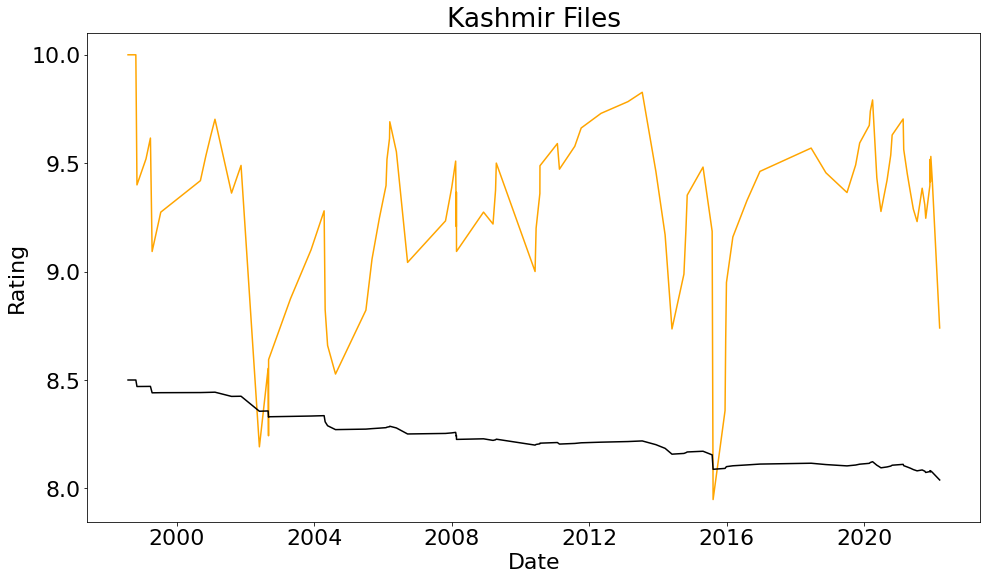

In [46]:
f = open('Data collection/The shawshanks redemption.json')
data = json.load(f)
plot_IMDB = get_moving_average(data,0.2)
plot_MODEL = get_moving_average(data,0.01)
graph_of_data(plot_IMDB,plot_MODEL,'Kashmir Files')

